In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
pandas is used for data manipulation and analysis
numpy is used for numerical operations
matplotlib.pyplot and seaborn are used for data visualization


# Zomato Data Analysis project

In [22]:
df = pd.read_excel("Zomato data.xlsx")

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [24]:
list(df.columns)

['name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'approx_cost(for two people)',
 'listed_in(type)']

In [26]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# type of Restaurant

Text(0.5, 0, 'type of Restaurant')

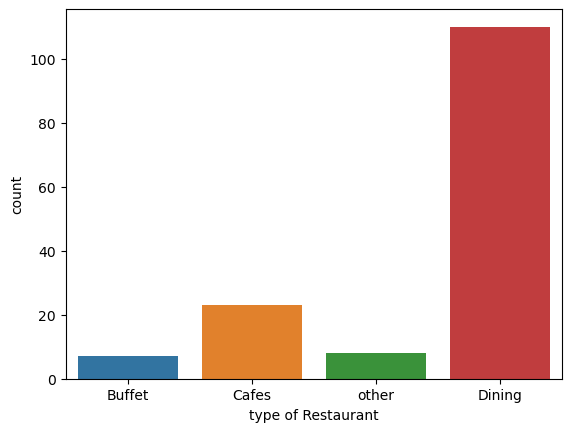

In [40]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("type of Restaurant")

# Conclusion - Majority of the resturant falls in dinning category

## Q:2 How many vote has each type of resturant received from customers?

In [41]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [55]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Votes')

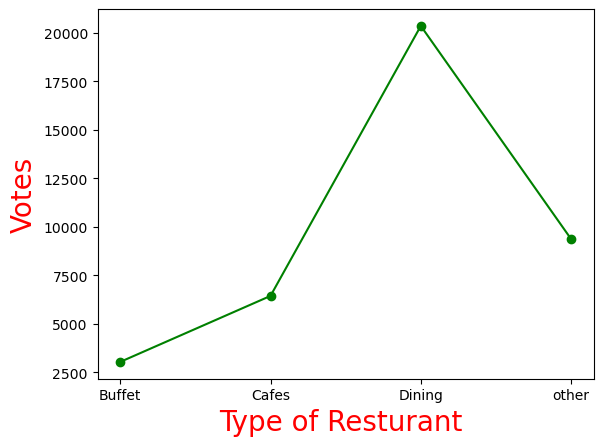

In [52]:

result = pd.DataFrame({
    'votes':grouped_data
})
plt.plot(result, c="green",marker="o")
plt.xlabel("Type of Resturant ", c="red",size=20)
plt.ylabel("Votes", c="red",size=20)

## Conclusion-dinig resturants has received maximum votes

# Q:3 What are the rating the majority of resturants received?

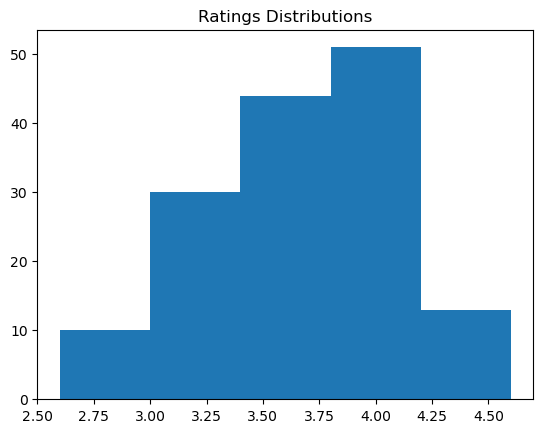

In [59]:
plt.hist(df['rate'],bins = 5)
plt.title("Ratings Distributions")
plt.show()

# Conclution - The Majority received rating from 3.5 to 4

# Q:4 Zomato has observed that most couples orders most of their food online. what their average spending on each order

In [60]:
#Average order spending by couples

In [61]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


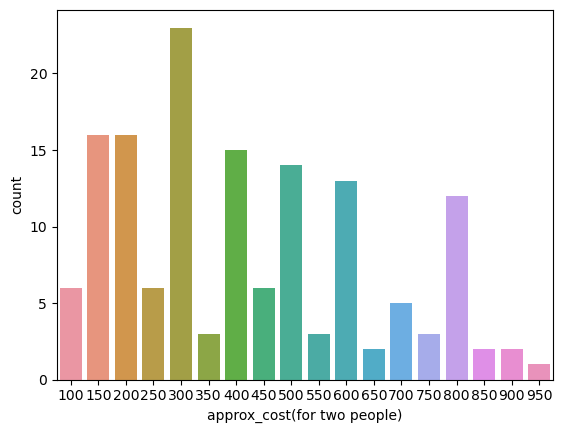

In [65]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel='approx_cost(for two people)'
plt.ylabel='count'

## Conclusion- The Majority of couples prefer resyurants with an approximate cost of 300 rs

# Q:5 which mode (online or ofline) has received the maximum rating? 

In [67]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


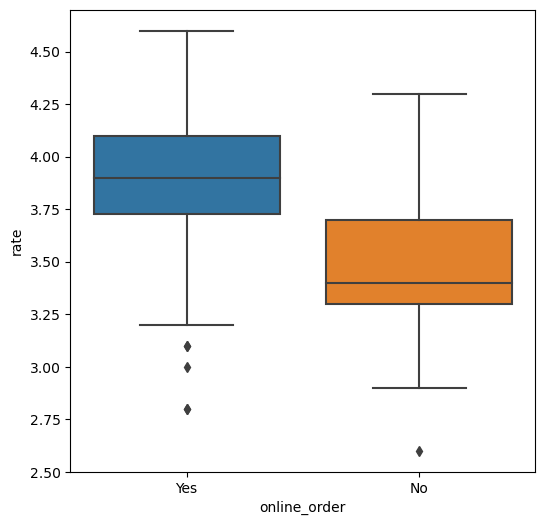

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=df)
plt.show()


## Conclusion - Offline order received lower rating in comparision to online order

# Q:6 Which type of Resturant received more offline order, so that zomato can pays customers with some good offers?

Text(0.5, 1.0, 'Heatmap')

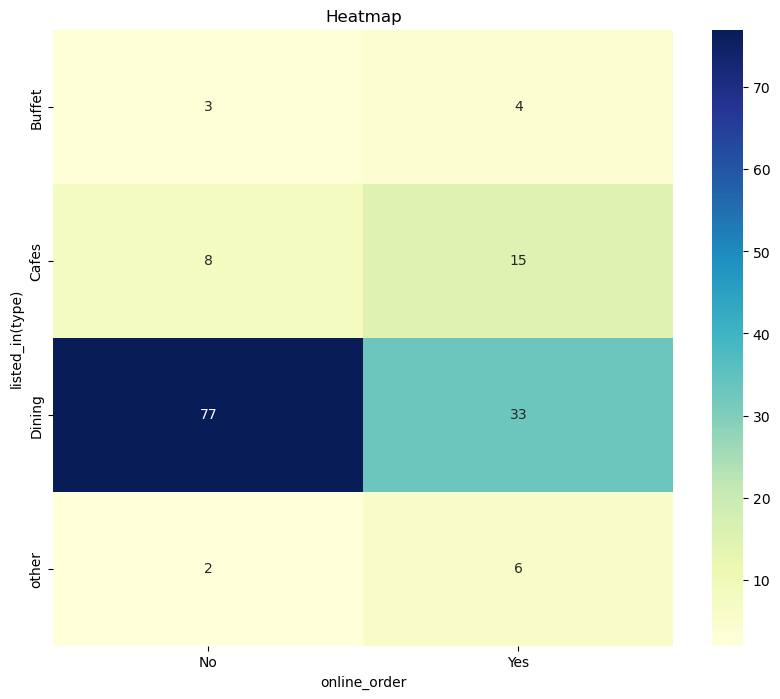

In [95]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

# Set the title and labels
plt.title('Heatmap')


### Conclusion - Dinig resturant primarily accept offline orders, whereas cafes primarly receive online order. this suggession that clients prefer order in person at resturants, but prefer online order at cafes.